## A simple Python notebook to calculate electronic properties of graphene

In [53]:
#load useful package 
import sys
from time import time
import numpy as np
import scipy.sparse as sparse
from numpy import linalg as LA

# for plotting 
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append("../../src/")

#load package 
from lattice import Lattice
from tightbinding import TightBinding

First create lattice object then create model object

In [52]:
lat1 = Lattice([0, 0, 0], pbc=False) # We don't need to specify the unit lattice as we specify atomic positions based on MD simulations (non periodic). 
lat1.getFromDataFile("graphene.txt") # load atomic configurations 
lat1.getParametersFromDataFile("graphene_constants.txt") #load graphene constants 
model = TightBinding(lat1) #create tight-binding model object 

Construct Hamiltonian : find nearest neighbors and construct Hamiltonian 

In [3]:
model.createHamiltonian() 

Finding neighbor(s): [####################] 100% DONE
find NearestNeighbors time: 37.796 s
Constructing Hamiltonian: [####################] 100% DONE
construct Hamiltonian time: 8.365 s
..ALL jobs are DONE!!..


Next, find eigenvalues and eigen vectors of Hamiltonian (named model.H)

In [31]:
vals, vecs = LA.eig(model.H) 
e = vals.real

Plot DOS of graphene (histogram of energy). 
Note that DOS should become like infinite lattice as we increase the size of graphene. The zero energies correspond edge atoms.

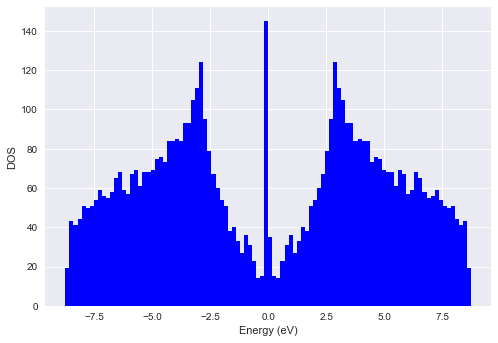

In [55]:
plt.hist(e, bins=100, color='b')
plt.xlabel('Energy (eV)')
plt.ylabel('DOS')
plt.show()